### Imports

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from MALDI_class import MALDI, rawMALDI, binnedMALDI, selectedMALDI

### Load example data

In [3]:
name = 'brain215re-27_V1_pos'#'brain201re-49_V1_pos'
path =  '/data/datadata/40_MALDI/MALDI/brain215re-27/V1/RAW-Data/' + name + '.imzML'#'/data/datadata/40_MALDI/MALDI/brain201re-49/V1/RAW-Data/' + name + '.imzML'
savedir = 'expdata/test0/'
resolution = 1e-5
M = MALDI(path, resolution = resolution, n_processes = 1)

IndexError: list index out of range

### Print Metadata

In [3]:
M.print_metadata()

{'file_description': {'type': 'fileContent',
                      'MS1 spectrum': True,
                      'profile spectrum': True,
                      'universally unique identifier': '{25E35984-2347-4920-A79F-DE910FCF0A22}',
                      'ibd SHA-1': 'F44F56ACA54C1C4509A79B52C847BBF8713C81E2',
                      'processed': True,
                      'source_files': {'sf1': {'type': 'sourceFile',
                                               'id': 'sf1',
                                               'name': '20210614_JW_#2_Schnitt49_V1.raw',
                                               'location': 'C:\\Xcalibur\\data\\2021\\2021_Jan\\20210614_JW_#2_Schnitt49_V1\\',
                                               'Thermo RAW format': True,
                                               'Thermo nativeID format': True,
                                               'SHA-1': ''}},
                      'contacts': [{'type': 'contact',
                             

### Load raw data

In [4]:
M_raw = rawMALDI(M.filename, M.resolution, M.Range, M.n_processes)
mzs = np.array([551.503, 605.548, 627.532, 697.478])#, 756.551, 768.588, 776.593, 781.622 ,784.583 ,790.608 ,810.598, 823.666, 832.664, 835.66, 835.669, 849.682, 863.698, 920.708])


### show TIC, single mass, single mass after normalization and center of mass images

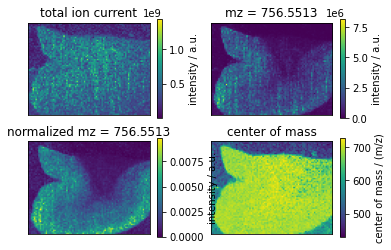

In [5]:
fig, axs = plt.subplots(2,2)

img = M_raw.get_2D(M_raw.sumpicture())
im = axs.flat[0].imshow(img)
axs.flat[0].set_xticks([])
axs.flat[0].set_yticks([])
axs.flat[0].set_title('total ion current')
fig.colorbar(im, ax = axs.flat[0], label = 'intensity / a.u.')

mz = mzs[0]
#753.588017481237#756.5513
img = M_raw.get_2D(M_raw.massvec(mz))
im = axs.flat[1].imshow(img)
axs.flat[1].set_xticks([])
axs.flat[1].set_yticks([])
axs.flat[1].set_title('mz = 756.5513')
fig.colorbar(im, ax = axs.flat[1], label = 'intensity / a.u.')

M_raw.normalize()    #data is changed in place, multiple execution of code block will alter the first two plots, if the prior code block is not re-executed as well
img = M_raw.get_2D(M_raw.massvec(mz))
im = axs.flat[2].imshow(img)
axs.flat[2].set_xticks([])
axs.flat[2].set_yticks([])
axs.flat[2].set_title('normalized mz = 756.5513')
fig.colorbar(im, ax = axs.flat[2], label = 'intensity / a.u.')

img = M_raw.get_2D(M_raw.center_of_mass())
im = axs.flat[3].imshow(img)
axs.flat[3].set_xticks([])
axs.flat[3].set_yticks([])
axs.flat[3].set_title('center of mass')
fig.colorbar(im, ax = axs.flat[3], label = 'center of mass / (m/z)')
plt.show()

### Fitting

In [6]:
positions = mzs
fitrange = M_raw.resolution*2
accuracy = 2.5e-6
if os.path.isfile(savedir + name + '_fitgauss' + '_chi_res.npy'):
    chi_res = np.load(savedir + name + '_fitgauss' + '_chi_res.npy')
    amp = np.load(savedir + name + '_fitgauss' + '_amps.npy')
    x0 = np.load(savedir + name + '_fitgauss' + '_x0.npy')
    sigma = np.load(savedir + name + '_fitgauss' + '_sigma.npy')
    amps_err = np.load(savedir + name + '_fitgauss' + '_amps_err.npy')
    x0_err = np.load(savedir + name + '_fitgauss' + '_x0_err.npy')
    sigma_err = np.load(savedir + name + '_fitgauss' + '_sigma_err.npy')
else:
    sigmas = (resolution * positions)/(2*np.sqrt(2*np.log(2)))
    amp = 0
    for pixel in M_raw.indices:
        amp += np.mean(M_raw.data_spectrum[pixel][1])
    amp /= len(M_raw.indices)
    amps = np.ones(mzs.shape)*amp
    
    chi_res, amp, x0, sigma, amps_err, x0_err, sigma_err = M_raw.fit_gauss(positions, sigmas, amps, fitrange, maxvalue_factor = 100)

    np.save(savedir + name + '_fitgauss' + '_chi_res.npy', chi_res)
    np.save(savedir + name + '_fitgauss' + '_amps.npy', amp)
    np.save(savedir + name + '_fitgauss' + '_x0.npy', x0)
    np.save(savedir + name + '_fitgauss' + '_sigma.npy', sigma)
    np.save(savedir + name + '_fitgauss' + '_amps_err.npy', amps_err)
    np.save(savedir + name + '_fitgauss' + '_x0_err.npy', x0_err)
    np.save(savedir + name + '_fitgauss' + '_sigma_err.npy', sigma_err)


adding model for peak  0
peak 0 not measured in pixels [134, 1764, 1888, 2009, 2021, 2022, 2512, 2518, 2527, 2767, 3156, 3771, 3911, 4040, 4168, 4293, 4294, 4420, 4784, 5037, 5164, 5169]
adding model for peak  1


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




adding model for peak  2


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




adding model for peak  3


In [8]:
def gausss(x, amp, x0, sigma):
    return amp*np.exp(-((x-x0)/sigma)**2/2)

### Test fits

In [29]:
from sklearn import metrics as m
for peak in range(len(positions)):
    sampling = np.arange(positions[peak] - fitrange*positions[peak], positions[peak] + fitrange*positions[peak], accuracy)
    allgauss = np.zeros((sampling.shape[0], M_raw.indices.shape[0]))
    my_label = 'data'
    indices = np.where(~np.isnan(x0[0,:]))[0]
    for pixel in indices:
        lower = M_raw.nearestmzindex(pixel, positions[peak] - fitrange*positions[peak])
        higher = M_raw.nearestmzindex(pixel, positions[peak] + fitrange*positions[peak])
        sampling = M_raw.data_spectrum[pixel][0][lower:higher]
        measured = M_raw.data_spectrum[pixel][1][lower:higher]
        fit = gausss(sampling, amp[peak, pixel], x0[peak, pixel], sigma[peak, pixel])
        #print(np.sum((measured-fit)**2/fit))
        #print(np.sum((measured-fit)**2/fit)/len(fit-1))
        #print(np.sum((measured*10-fit*10)**2/fit))
        #print(np.sum((measured*10-fit*10)**2/fit)/len(fit-1))
        print('yeehaaa')
        from sklearn import metrics as m
        print(m.r2_score(measured, fit))
        print(1 - chi_res[peak, pixel] / np.var(measured, ddof=3))
        print(1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2))
        

yeehaaa
0.9981055361056805
0.9981055361056805
0.9981055361056805
yeehaaa
0.9971104141398413
0.9971104141398413
0.9971104141398413
yeehaaa
0.9991035431376729
0.9991035431376729
0.9991035431376729
yeehaaa
0.998809529553448
0.998809529553448
0.998809529553448
yeehaaa
0.9976156799806793
0.9976156799806793
0.9976156799806793
yeehaaa
0.9677782300234297
0.9677782300234297
0.9677782300234297
yeehaaa
0.9984536103999522
0.9984536103999522
0.9984536103999522
yeehaaa
0.9970241572101948
0.9970241572101948
0.9970241572101948
yeehaaa
0.9982998204645632
0.9982998204645632
0.9982998204645632
yeehaaa
0.9968300560791234
0.9968300560791234
0.9968300560791234
yeehaaa
0.9493996898965626
0.9493996898965626
0.9493996898965626
yeehaaa
0.9982063614511516
0.9982063614511516
0.9982063614511516
yeehaaa
0.998357298534107
0.998357298534107
0.998357298534107
yeehaaa
0.9990354672292645
0.9990354672292645
0.9990354672292645
yeehaaa
0.9993130765002786
0.9993130765002786
0.9993130765002786
yeehaaa
0.9909352065183538
0.99

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

### Print single results

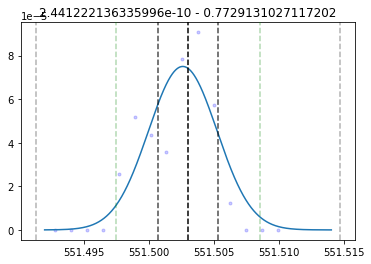

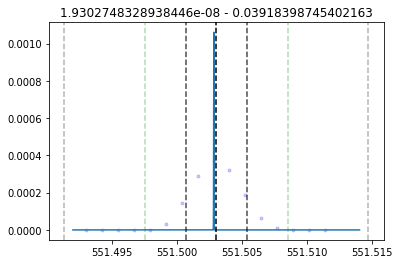

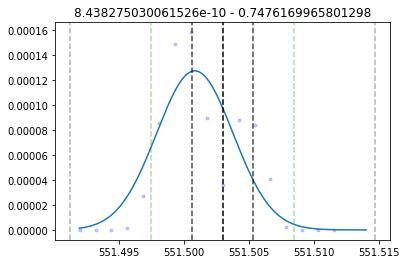

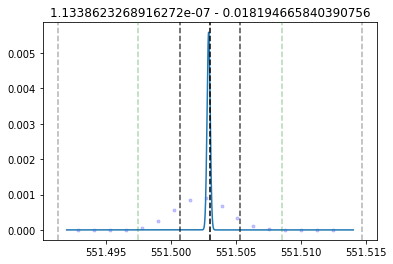

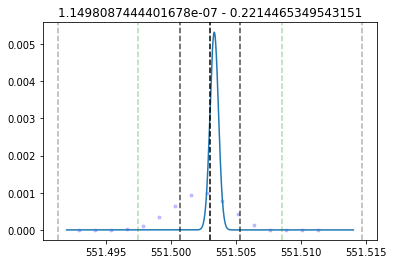

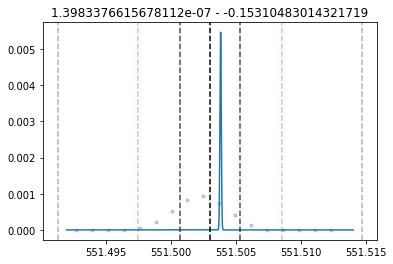

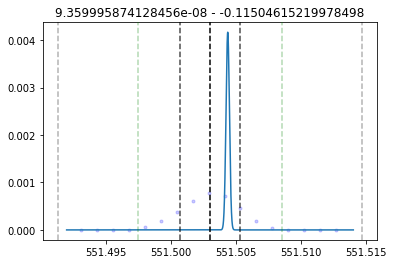

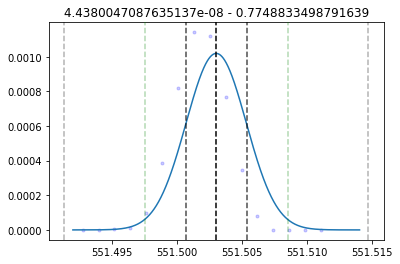

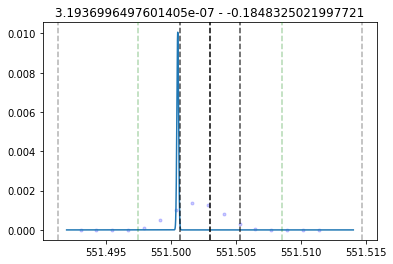

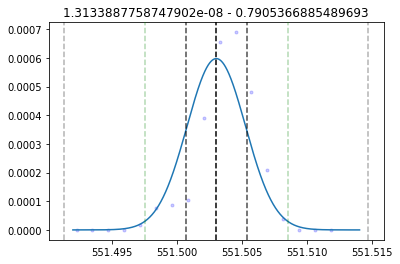

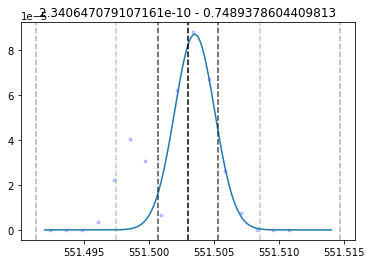

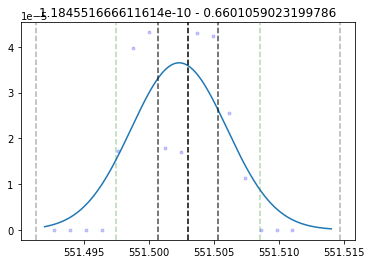

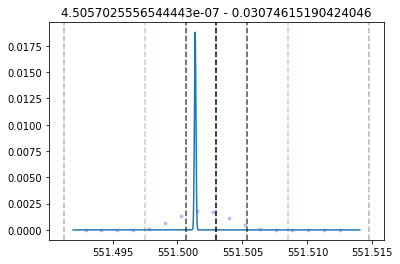

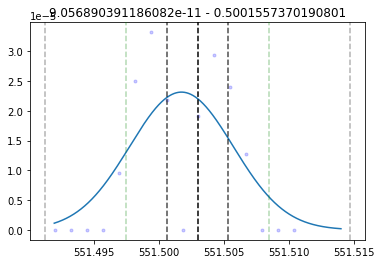

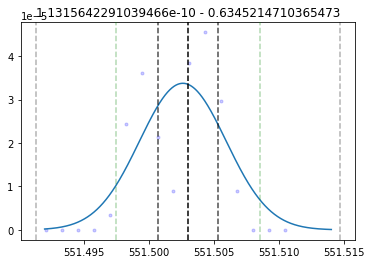

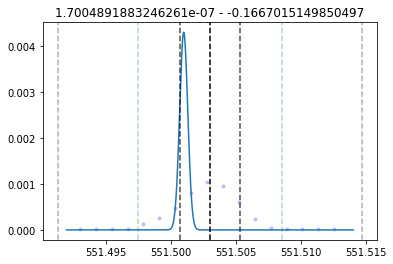

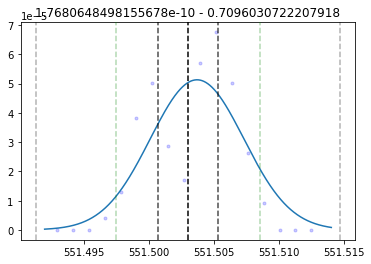

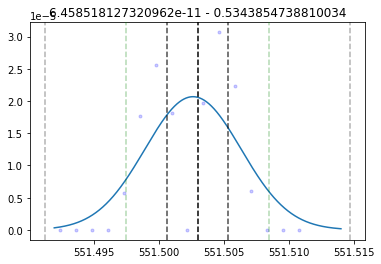

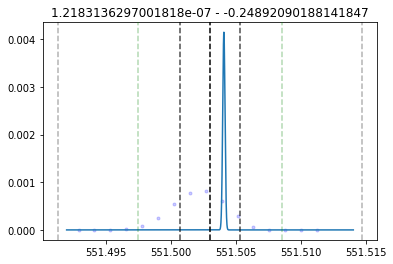

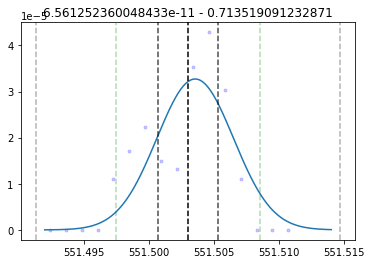

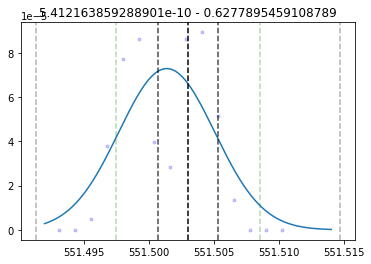

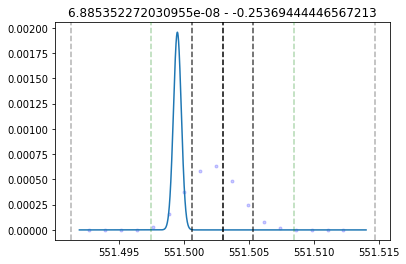

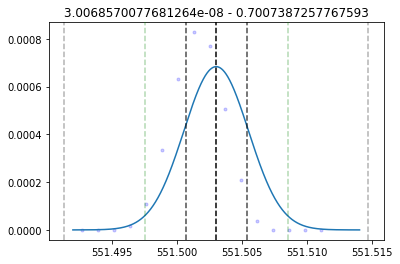

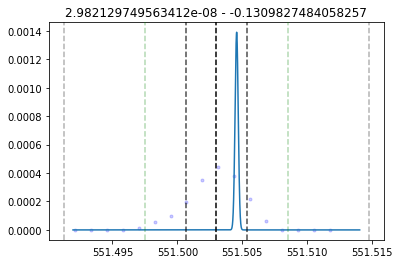

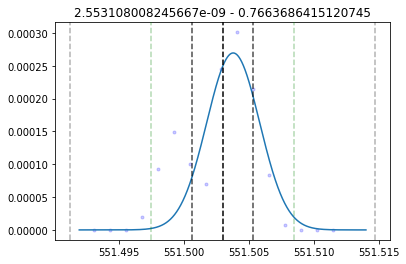

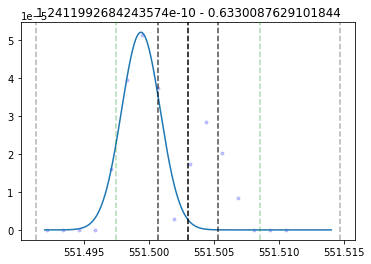

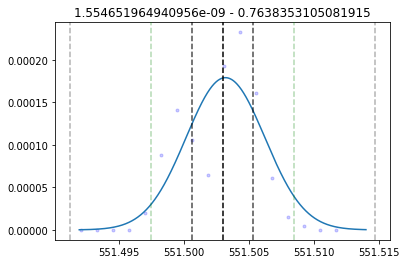

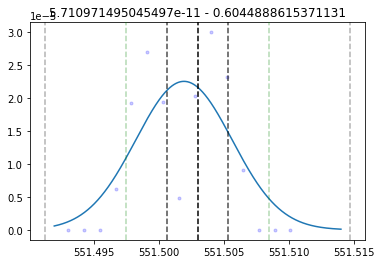

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


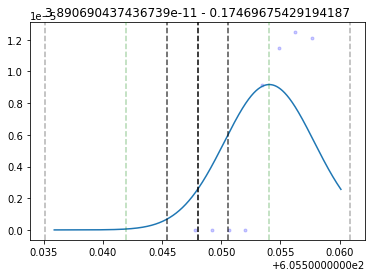

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


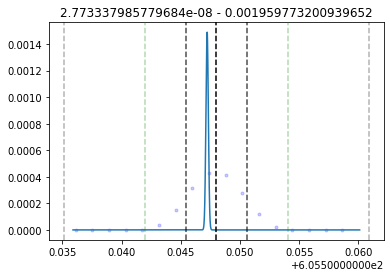

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


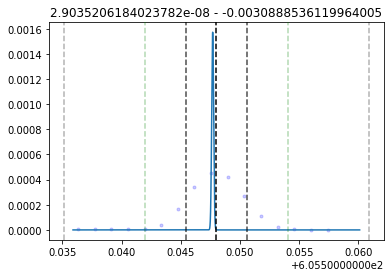

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


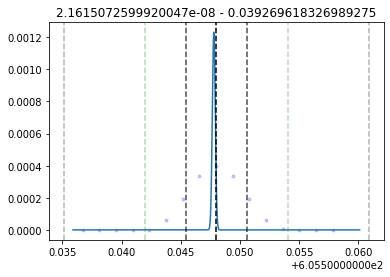

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


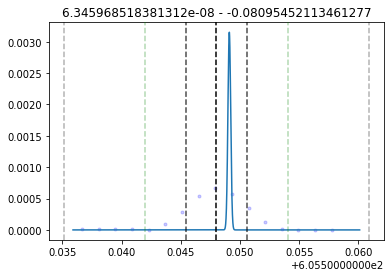

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


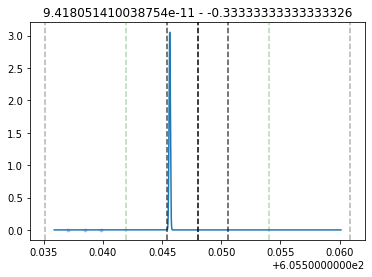

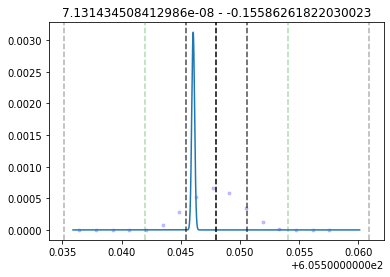

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


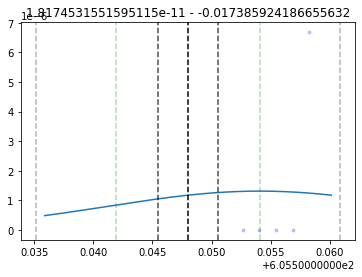

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


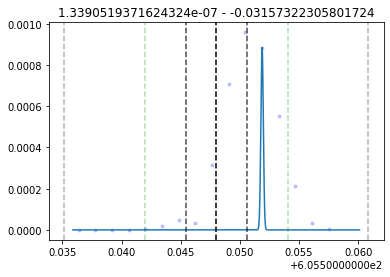

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


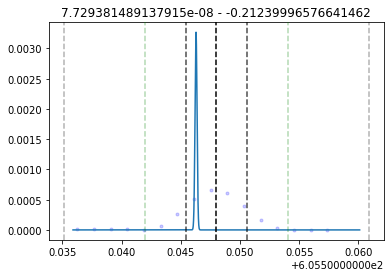

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


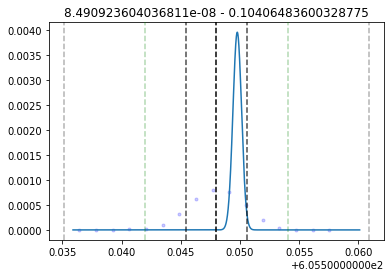

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


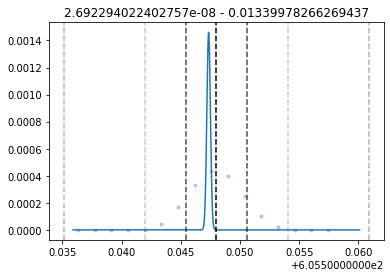

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


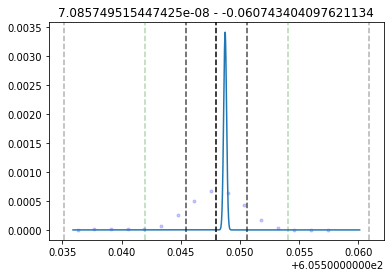

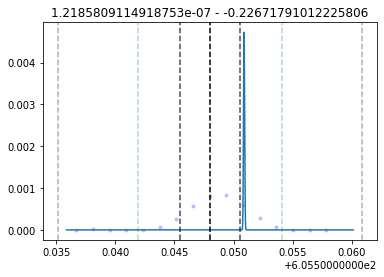

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


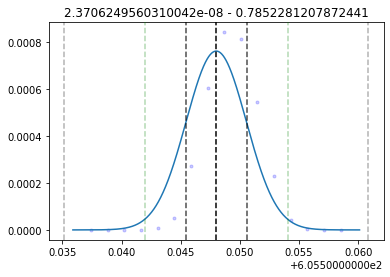

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


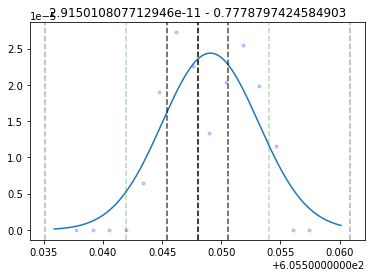

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


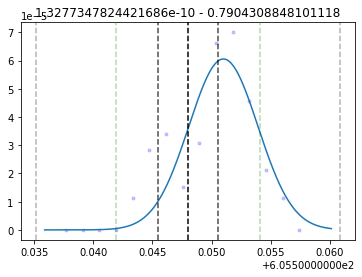

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


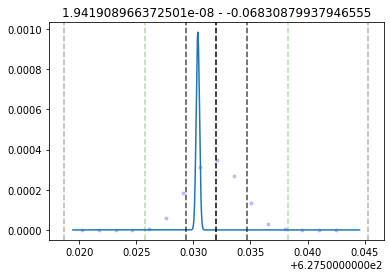

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


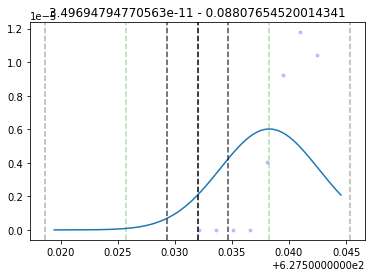

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


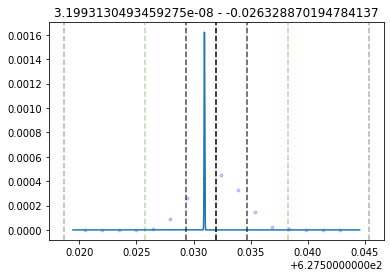

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


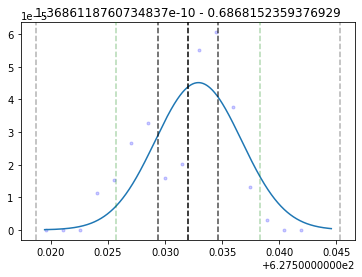

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


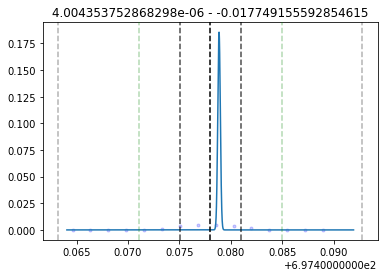

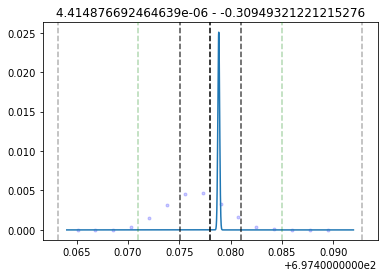

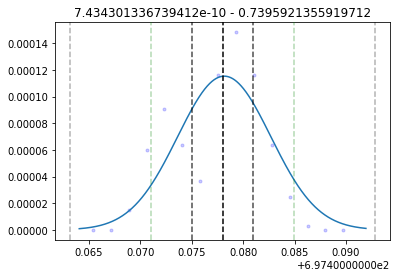

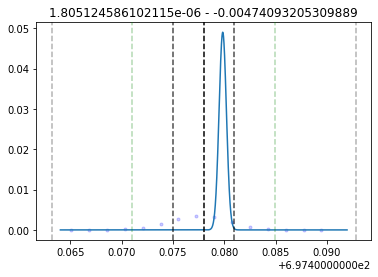

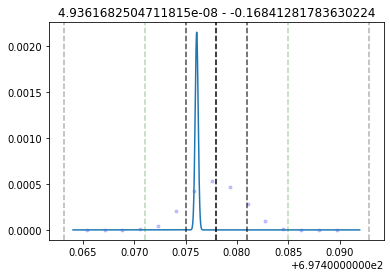

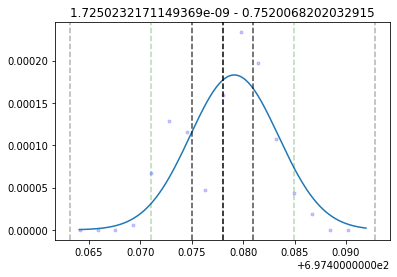

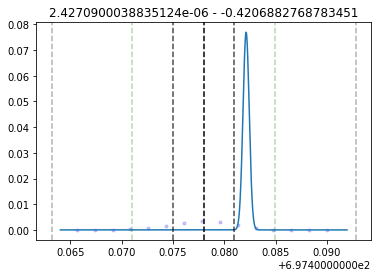

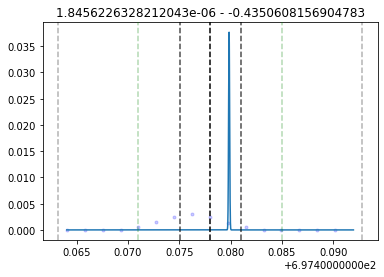

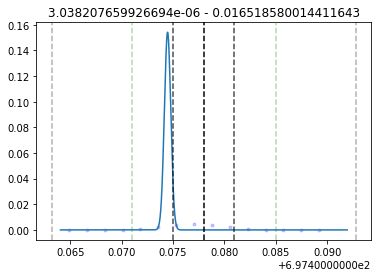

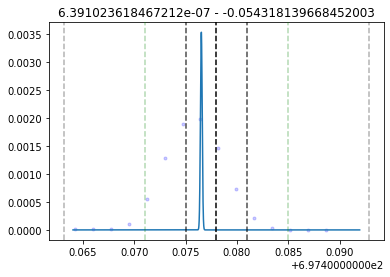

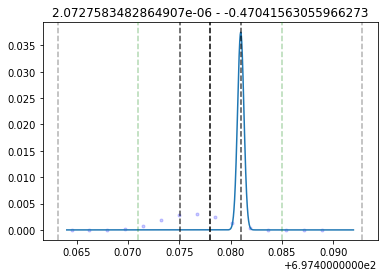

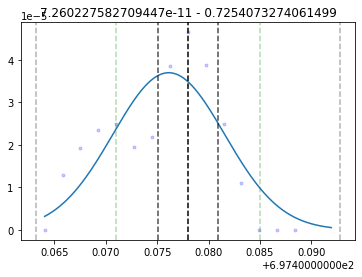

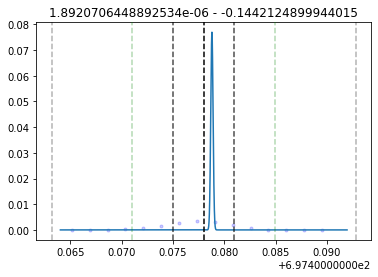

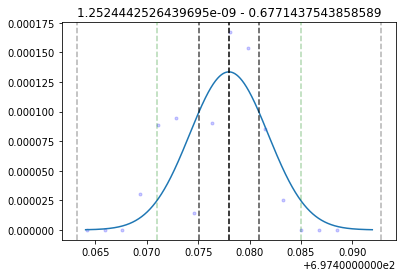

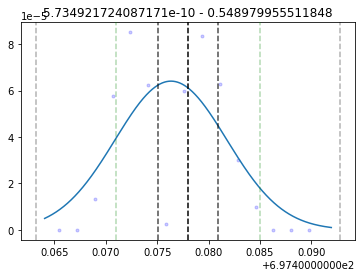

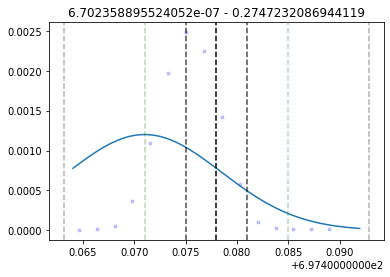

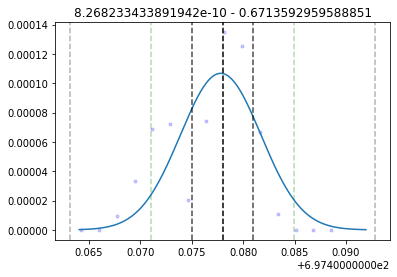

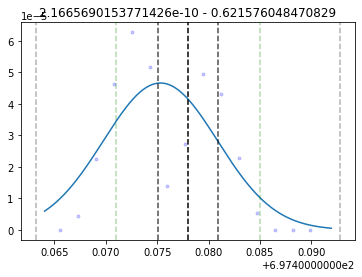

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


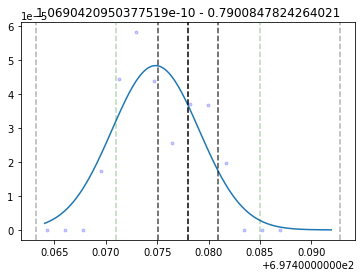

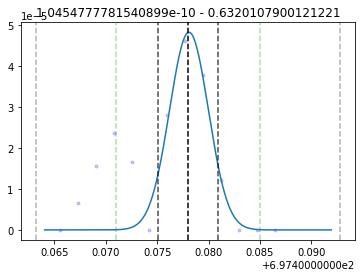

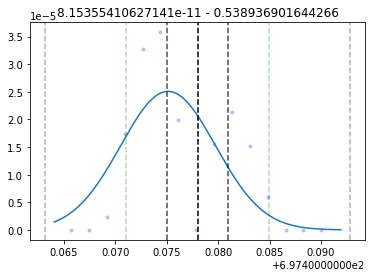

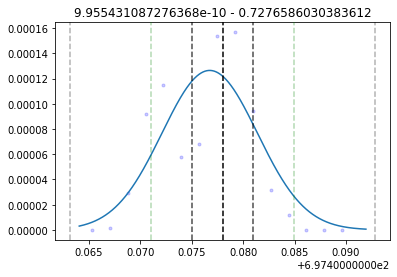

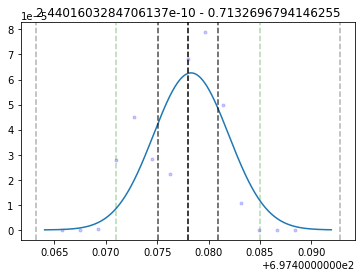

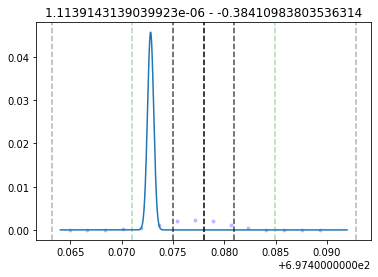

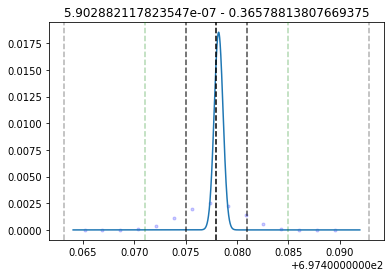

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


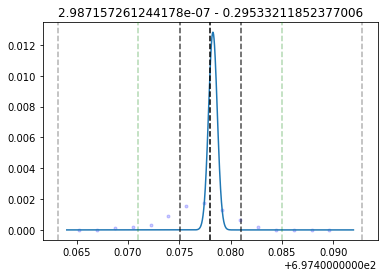

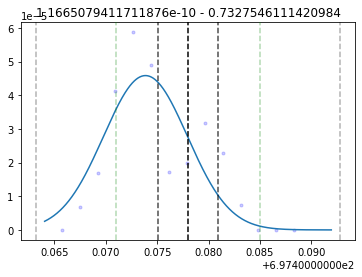

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_125803/3728875811.py:14: RuntimeWarning: invalid value encountered in double_scalars
  rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)


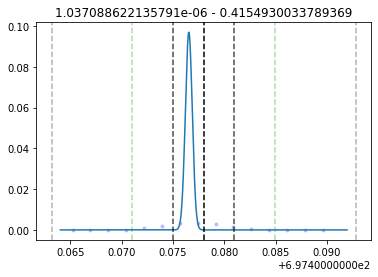

In [40]:
for peak in range(len(positions)):
    sampling = np.arange(positions[peak] - fitrange*positions[peak], positions[peak] + fitrange*positions[peak], accuracy)
    allgauss = np.zeros((sampling.shape[0], M_raw.indices.shape[0]))
    my_label = 'data'
    indices = np.where(~np.isnan(x0[0,:]))[0]
    for pixel in indices:
        #if (chi_res[peak, pixel] >1e-8):
        print(pixel, end = '\r')
        minindex = M_raw.nearestmzindex(pixel, positions[peak] - fitrange*positions[peak])
        maxindex = M_raw.nearestmzindex(pixel, positions[peak] + fitrange*positions[peak])
        measured = M_raw.data_spectrum[pixel][1][minindex:maxindex]
        fit = gausss(M_raw.data_spectrum[pixel][0][minindex:maxindex], amp[peak, pixel], x0[peak, pixel], sigma[peak, pixel])
        rsquared = 1 - np.sum((measured-fit)**2)/np.sum((measured-np.mean(measured))**2)
        if rsquared <.8:
                SINNVLLES LIMIT FINDEN UND DANN GGF. IN DIE KLASSE ALS UEBERGABEPARAMETER IMPLEMENTIEREN
                WENN ES NICHT KLAPPT NOCHMAL FITTEN ODER EINFACH WEGWERFEN?
            if M_raw.data_spectrum[pixel][0][minindex]<sampling[0]:
                minindex +=1
            if M_raw.data_spectrum[pixel][0][maxindex]>sampling[-1]:
                maxindex -=1
            if (minindex < maxindex):
                x = M_raw.data_spectrum[pixel][0][minindex:maxindex]
                y = M_raw.data_spectrum[pixel][1][minindex:maxindex]
                plt.plot(x, y, 'b.', label = my_label, alpha = .2)
                my_label = "_nolegend_"
            allgauss[:,pixel] = gausss(sampling, amp[peak, pixel], x0[peak, pixel], sigma[peak, pixel])
            plt.axvline(positions[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002)
            plt.axvline(positions[peak]+sigmas[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002, alpha = .7)
            plt.axvline(positions[peak]-sigmas[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002, alpha = .7)
            plt.axvline(positions[peak]+5*sigmas[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002, alpha = .3)
            plt.axvline(positions[peak]-5*sigmas[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002, alpha = .3)
            plt.axvline(positions[peak]+positions[peak]*resolution, linestyle = '--', color = 'g', label = 'standard', zorder = 10002, alpha = .3)
            plt.axvline(positions[peak]-positions[peak]*resolution, linestyle = '--', color = 'g', label = 'standard', zorder = 10002, alpha = .3)
            plt.plot(sampling, allgauss[:,pixel])
            #plt.ylim([0,.0018])

            plt.title(str(chi_res[peak, pixel]) + ' - ' + str(rsquared))
            plt.show()

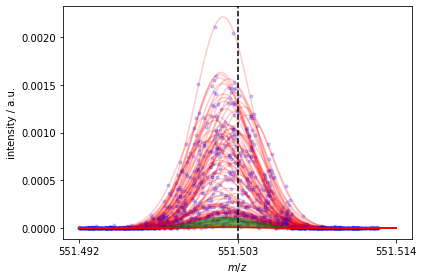

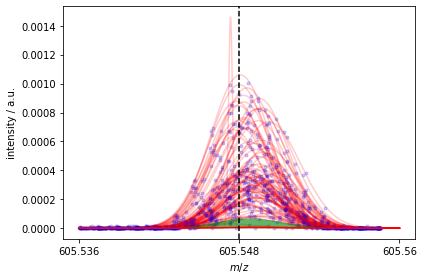

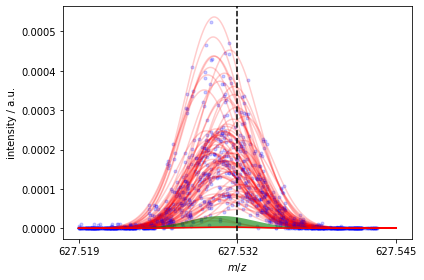

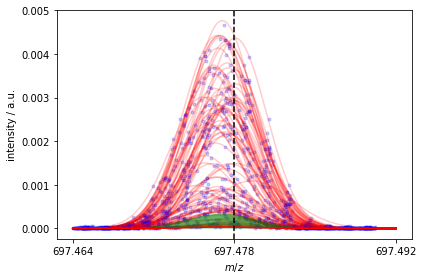

In [15]:
for peak in range(len(positions)):
    sampling = np.arange(positions[peak] - fitrange*positions[peak], positions[peak] + fitrange*positions[peak], accuracy)
    allgauss = np.zeros((sampling.shape[0], M_raw.indices.shape[0]))
    my_label = 'data'
    indices = np.where(~np.isnan(x0[0,:]))[0]
    for pixel in np.random.randint(0,len(M_raw.indices),100):#indices:
        print(pixel, end = '\r')
        minindex = M_raw.nearestmzindex(pixel, positions[peak] - fitrange*positions[peak])
        maxindex = M_raw.nearestmzindex(pixel, positions[peak] + fitrange*positions[peak])
        if M_raw.data_spectrum[pixel][0][minindex]<sampling[0]:
            minindex +=1
        if M_raw.data_spectrum[pixel][0][maxindex]>sampling[-1]:
            maxindex -=1
        if (minindex < maxindex):
            x = M_raw.data_spectrum[pixel][0][minindex:maxindex]
            y = M_raw.data_spectrum[pixel][1][minindex:maxindex]
            plt.plot(x, y, 'b.', label = my_label, alpha = .2)
            my_label = "_nolegend_"
        allgauss[:,pixel] = gausss(sampling, amp[peak, pixel], x0[peak, pixel], sigma[peak, pixel])
        plt.plot(sampling, allgauss[:,pixel], color='red', alpha=.2)
    

    avrggauss = np.nanmean(allgauss, axis = 1)
    sigmagauss = np.nanstd(allgauss, axis = 1)
    plt.plot(sampling, avrggauss, 'red', label = 'average fit', zorder = 10001)
    plt.fill_between(sampling, np.maximum(avrggauss-sigmagauss,0), avrggauss+sigmagauss, facecolor='green', alpha=.6,label = 'Std of average fit', zorder = 10000)
    plt.axvline(positions[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002)
    #axs.flat[peak].legend()
    plt.gca().set_xlabel('$m/z$')
    plt.gca().set_ylabel('intensity / a.u.')
    plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(True)
    plt.gca().set_xticks([sampling[0], positions[peak], sampling[-1]])
    plt.gca().set_xticklabels([np.round(sampling[0], 3), np.round(positions[peak],3), np.round(sampling[-1], 3)])
    plt.tight_layout()
    plt.show()

### Print results overview

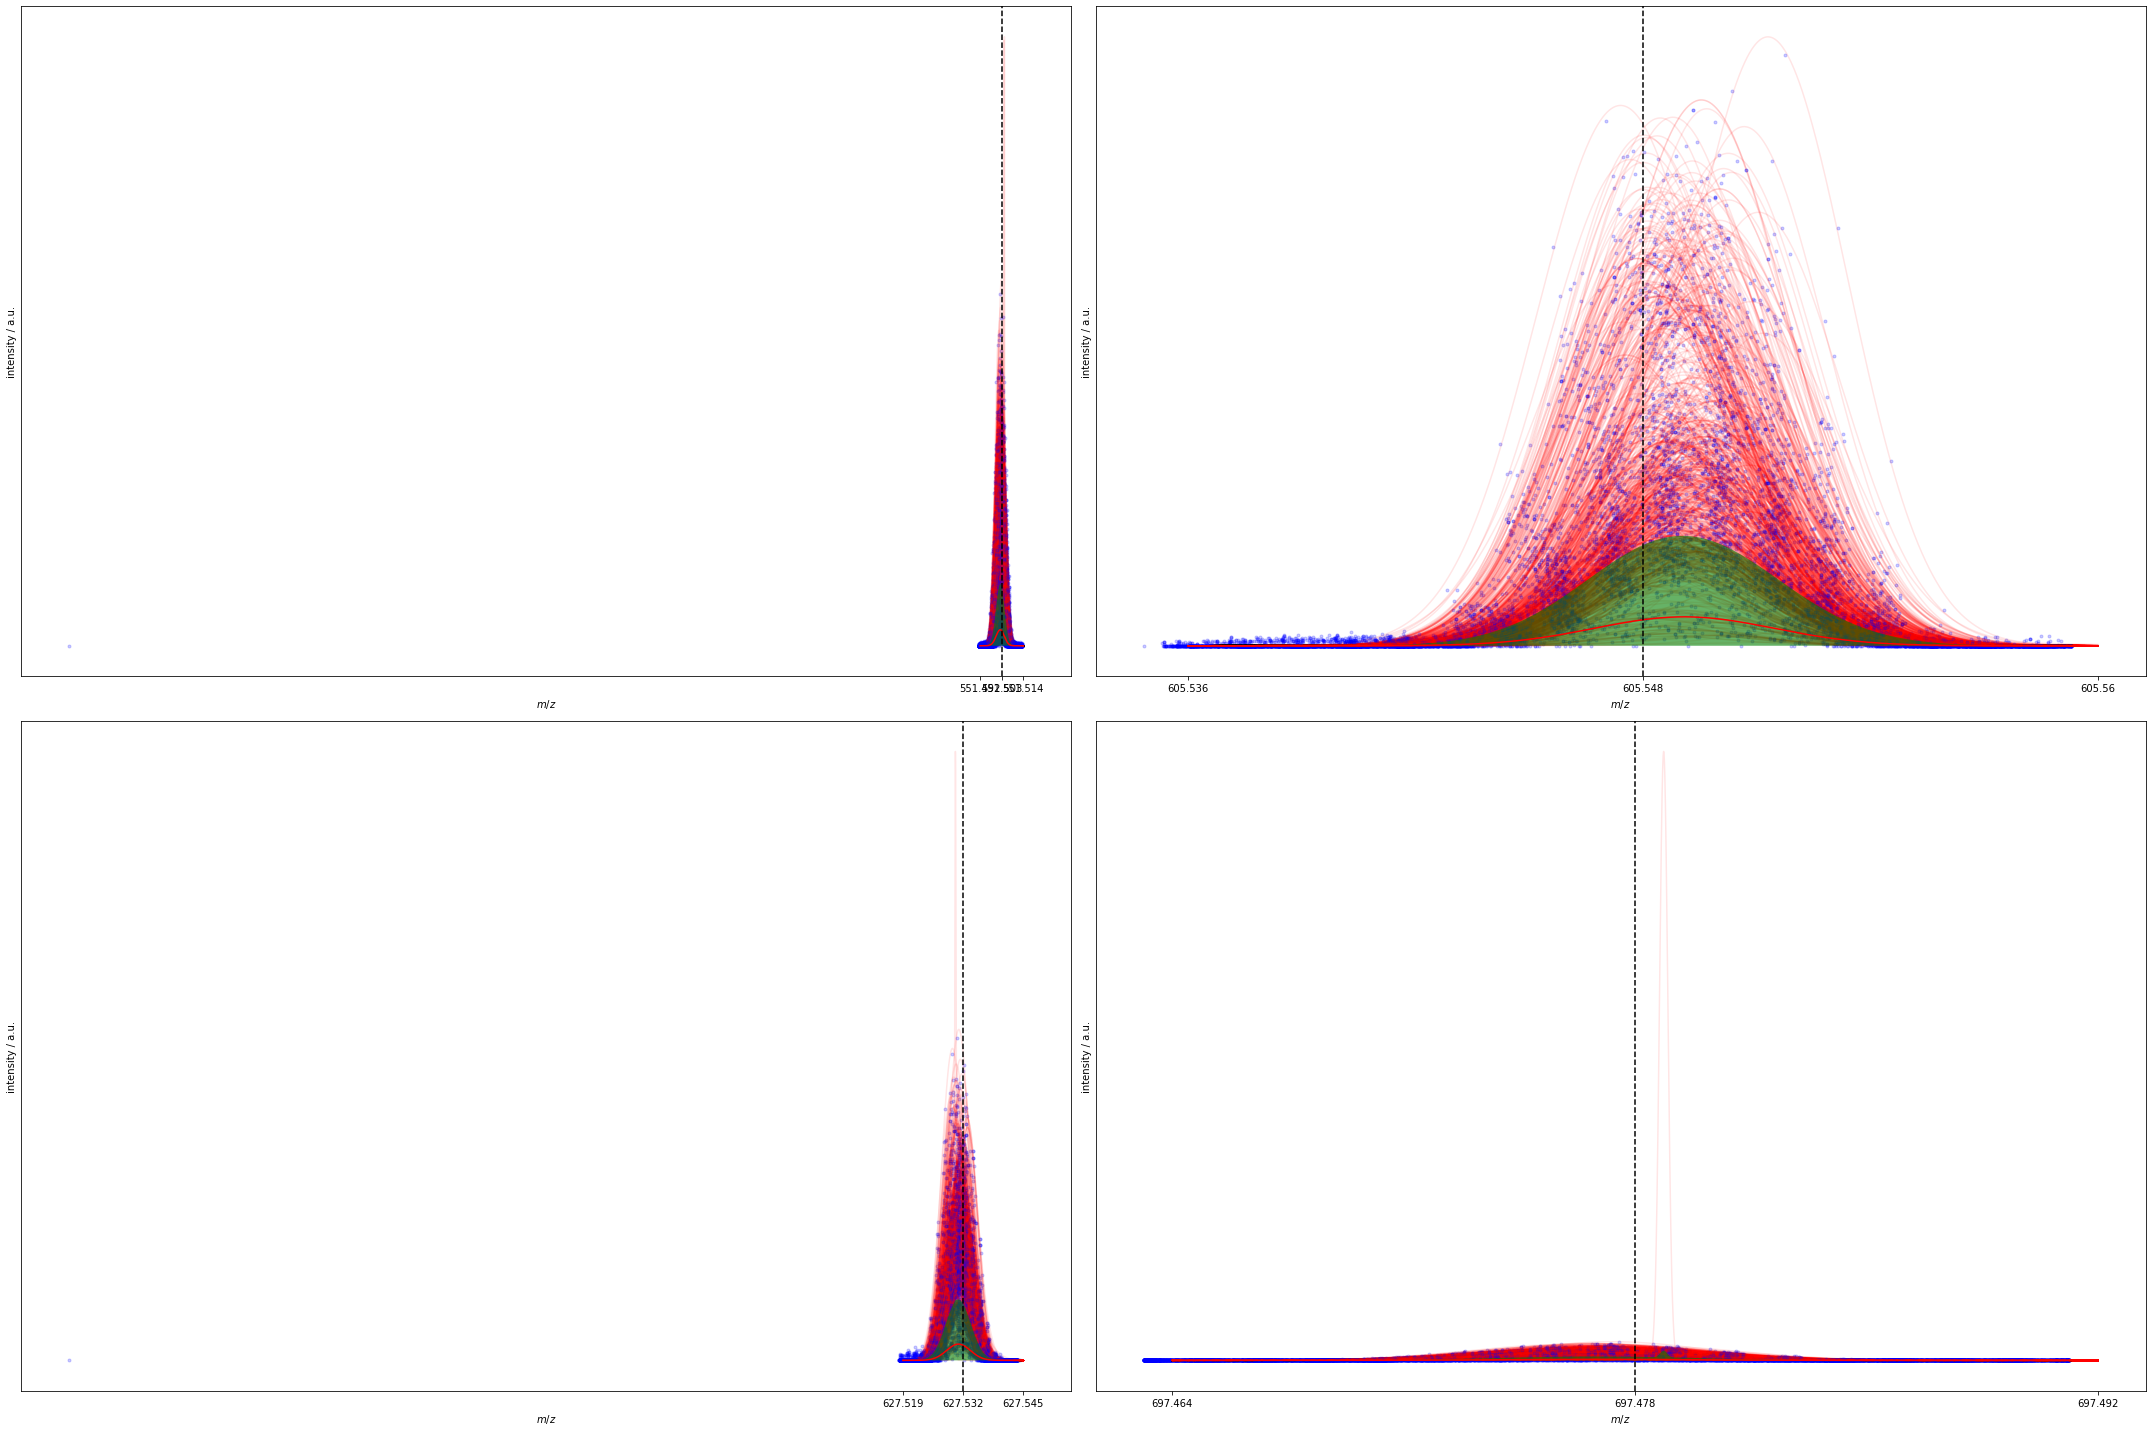

In [17]:
n = len(positions)
fig, axs = plt.subplots(nrows=int(np.ceil(np.sqrt(n))), ncols=int(np.ceil(n/np.ceil(np.sqrt(n)))), figsize=(30, 20), subplot_kw={'xticks': [], 'yticks': []})

for peak in range(len(positions)):
    sampling = np.arange(positions[peak] - fitrange*positions[peak], positions[peak] + fitrange*positions[peak], accuracy)
    allgauss = np.zeros((sampling.shape[0], M_raw.indices.shape[0]))
    meany = 0
    my_label = 'data'
    indices = np.where(~np.isnan(x0[0,:]))[0]
    for pixel in np.random.randint(0,len(M_raw.indices),1000):#indices:
        print(pixel, end = '\r')
        minindex = M_raw.nearestmzindex(pixel, positions[peak] - fitrange*positions[peak])
        maxindex = M_raw.nearestmzindex(pixel, positions[peak] + fitrange*positions[peak])
        if (minindex < maxindex):
            x = M_raw.data_spectrum[pixel][0][minindex:maxindex]
            y = M_raw.data_spectrum[pixel][1][minindex:maxindex]
            meany += np.nanmean(y)
            axs.flat[peak].plot(x, y, 'b.', label = my_label, alpha = .2)
        my_label = "_nolegend_"
        allgauss[:,pixel] = gausss(sampling, amp[peak, pixel], x0[peak, pixel], sigma[peak, pixel])
        axs.flat[peak].plot(sampling, allgauss[:,pixel], color='red', alpha=.1)
        
    meany /= np.nanmax(M_raw.indices)
    avrggauss = np.nanmean(allgauss, axis = 1)
    sigmagauss = np.nanstd(allgauss, axis = 1)
    axs.flat[peak].plot(sampling, avrggauss, 'red', label = 'average fit', zorder = 10001)
    axs.flat[peak].fill_between(sampling, np.maximum(avrggauss-sigmagauss,0), avrggauss+sigmagauss, facecolor='green', alpha=.6,label = 'Std of average fit', zorder = 10000)
    axs.flat[peak].axvline(positions[peak], linestyle = '--', color = 'k', label = 'standard', zorder = 10002)
    #axs.flat[peak].legend()
    axs.flat[peak].set_xlabel('$m/z$')
    axs.flat[peak].set_ylabel('intensity / a.u.')
    axs.flat[peak].get_xaxis().get_major_formatter().set_useOffset(False)
    axs.flat[peak].get_yaxis().get_major_formatter().set_useOffset(True)
    axs.flat[peak].set_xticks([sampling[0], positions[peak], sampling[-1]])
    axs.flat[peak].set_xticklabels([np.round(sampling[0], 3), np.round(positions[peak],3), np.round(sampling[-1], 3)])
plt.tight_layout()
plt.show()

### Bin data

In [ ]:
M_binned = binnedMALDI(M.filename, M.resolution, M.Range, M.n_processes, data_spectrum = M_raw.data_spectrum)

In [ ]:
fig, axs = plt.subplots(2,2)
mz = 756.5513
img = M_binned.get_2D(M_binned.massvec(mz))
axs.flat[0].imshow(img)
axs.flat[0].set_xticks([])
axs.flat[0].set_yticks([])
axs.flat[0].set_title('mz = 756.5513')
fig.colorbar(im, ax = axs.flat[0], label = 'intensity / a.u.')
plt.show()

### now, add other binnedMALDI functions

### add metaspace class, make mz list and then try selected including mask_on